# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


```python

```

# 数据加工
- 分别剥离收到offer，查看offer，完成offer和交易记录的信息表

In [4]:
offer_received=transcript[transcript.event=='offer received']

In [5]:
offer_received['offer_id']=[x['offer id'] for x in offer_received.value]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
offer_viewed=transcript[transcript.event=='offer viewed']

In [7]:
offer_viewed['offer_id']=[x['offer id'] for x in offer_viewed.value]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
offer_completed=transcript[transcript.event=='offer completed']

In [9]:
offer_completed['offer_id']=[x['offer_id'] for x in offer_completed.value]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
offer_trans=transcript[transcript.event=='transaction']

In [11]:
offer_trans['amount']=[x['amount'] for x in offer_trans.value]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
print(len(offer_received.offer_id.unique()), len(offer_viewed.offer_id.unique()), len(offer_completed.offer_id.unique()))

10 10 8


In [13]:
print("收到offer人数:",len(offer_received.person.unique()))
print("查看offer人数:",len(offer_viewed.person.unique()))
print("进行交易人数:",len(offer_trans.person.unique()))
print("完成offer人数:",len(offer_completed.person.unique()))

收到offer人数: 16994
查看offer人数: 16834
进行交易人数: 16578
完成offer人数: 12774


In [14]:
view_data = offer_viewed[['person','time','offer_id']].rename(columns={'time':'view_time'})
view_data['view_tag'] = 1

In [15]:
received_data = offer_received[['person','time','offer_id']].rename(columns={'time':'received_time'})
received_data['received_tag']=1

In [16]:
trans_data = offer_trans[['person','time','amount']].rename(columns={'time':'trans_time'})
trans_data['tran_tag'] = 1

In [17]:
complete_data = offer_completed[['person','time','offer_id']].rename(columns={'time':'complete_time'})
complete_data['complete_tag'] = 1

In [18]:
mid_data = pd.merge(received_data, view_data, on=['person','offer_id'], how='left')

In [19]:
mid2 = pd.merge(mid_data, complete_data,on=['person','offer_id'], how='left')

In [20]:
trans_data[trans_data.person=='a03223e636434f42ac4c3df47e8bac43']

,person,trans_time,amount,tran_tag
90553,a03223e636434f42ac4c3df47e8bac43,234,1.09,1
97700,a03223e636434f42ac4c3df47e8bac43,264,3.50,1
277104,a03223e636434f42ac4c3df47e8bac43,612,0.06,1


# 查看率和使用率统计

In [21]:
temp=received_data.groupby('offer_id')['offer_id'].count()
mid_dict={'offer_id':temp.index, 'receive_cnt':temp.values}
rec_info=pd.DataFrame(mid_dict)

In [22]:
temp=view_data.groupby('offer_id')['offer_id'].count()
mid_dict={'offer_id':temp.index, 'view_cnt':temp.values}
view_info = pd.DataFrame(mid_dict)
all_info = rec_info.merge(view_info, on ='offer_id')
all_info.shape

(10, 3)

In [23]:
temp=complete_data.groupby('offer_id')['offer_id'].count()
mid_dict={'offer_id':temp.index, 'complete_cnt':temp.values}
complete_info = pd.DataFrame(mid_dict)
all_info = pd.merge(all_info, complete_info, on='offer_id',how='left')

In [24]:
all_info['view_pct'] = 100*all_info['view_cnt']/all_info['receive_cnt']
all_info['complete_pct'] = 100*all_info['complete_cnt']/all_info['receive_cnt']

In [25]:
temp=pd.merge(all_info, portfolio, left_on='offer_id', right_on='id', how='left')
temp

,offer_id,receive_cnt,view_cnt,complete_cnt,view_pct,complete_pct,channels,difficulty,duration,id,offer_type,reward
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,2663,3420.0,34.728743,44.600939,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7646,7337,5156.0,95.958671,67.433952,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
2,2906b810c7d4411798c6938adc9daaa5,7632,4118,4017.0,53.957023,52.633648,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
3,3f207df678b143eea3cee63160fa8bed,7617,4144,NaN,54.404621,NaN,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,7593,7298,3331.0,96.114843,43.869353,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
5,5a8bc65990b245e5a138643cd4eb9837,7618,6687,NaN,87.778945,NaN,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4171,4354.0,54.331119,56.714863,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
7,ae264e3637204a6fb9bb56bc8210ddfd,7658,6716,3688.0,87.699138,48.158788,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
8,f19421c1d4aa40978ebb69ca19b0e20d,7571,7264,4296.0,95.945053,56.742835,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,fafdcd668e3743c1bb461111dcafc2a4,7597,7327,5317.0,96.445966,69.988153,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2


从各offer的查看率和完成率指标可以看到，表现最好的为fafdcd668e3743c1bb461111dcafc2a4，表现最差的是4d5c57ea9a6940dd891ad53e9dbe8da0

# 建立预测客户是否会完成offer的分类模型
- 三类因子
  - offer性质相关的因子: difficulty, duration, channels, offer_type, reward
  - 客户基本信息相关的因子: age, 成为会员的时间， sex, income
  - 客户历史行为：平均交易金额，查看offer距离收到offer的平均时长，查看offer的次数

In [26]:
midna=mid2.dropna(subset=['view_time'],axis=0)
midna['view_gap']=midna['view_time']-midna['received_time']
temp=midna.groupby(['person'])['view_gap'].mean()
mid_dict={'person':temp.index, 'view_gap':temp.values}
view_time = pd.DataFrame(mid_dict)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
final_df = mid2[['person','offer_id','complete_tag']].drop_duplicates()

In [28]:
final_df=final_df.merge(view_time,on='person',how='left')

In [29]:
temp=trans_data.groupby(['person'])['amount'].mean()
mid_dict={'person':temp.index, 'amount_mean':temp.values}
amount = pd.DataFrame(mid_dict)

In [30]:
final_df=final_df.merge(amount,on='person',how='left')

In [31]:
temp=midna.groupby(['person'])['person'].count()
mid_dict={'person':temp.index, 'view_times':temp.values}
view_time = pd.DataFrame(mid_dict)
final_df=final_df.merge(view_time,on='person',how='left')

In [32]:
final_df=pd.merge(final_df, profile, how='left', left_on='person', right_on='id')

In [33]:
for idx,item in enumerate(portfolio['channels']):
    if 'email' in item:
        portfolio.loc[idx,'is_email']=1
    else:
        portfolio.loc[idx,'is_email']=0
    if 'mobile' in item:
        portfolio.loc[idx,'is_mobile']=1
    else:
        portfolio.loc[idx,'is_mobile']=0
    if 'web' in item:
        portfolio.loc[idx,'is_web']=1
    else:
        portfolio.loc[idx,'is_web']=0
    if 'social' in item:
        portfolio.loc[idx,'is_social']=1
    else:
        portfolio.loc[idx,'is_social']=0

In [34]:
portfolio.drop('channels',inplace=True,axis=1)

In [35]:
final_df=pd.merge(final_df,portfolio,left_on='offer_id',right_on='id',how='left')

In [36]:
final_df.head()

,person,offer_id,complete_tag,view_gap,amount_mean,view_times,age,became_member_on,gender,id_x,income,difficulty,duration,id_y,offer_type,reward,is_email,is_mobile,is_web,is_social
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,33.000000,22.752857,4.0,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1.0,1.0,1.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,-38.571429,1.550000,7.0,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1.0,0.0,1.0,0.0
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,NaN,16.000000,19.243333,3.0,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1.0,1.0,1.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,NaN,27.428571,NaN,7.0,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,66.000000,0.120000,4.0,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1.0,1.0,1.0,1.0


In [37]:
dtype_dict={
    'view_gap': float,'amount_mean':float, 'view_times':float,
    'age':float,'became_member_on':float, 'gender':str,
    'income':float, 'difficulty':float,'duration':float,
    'offer_type':str,'reward':float,'is_email':int,
    'is_mobile':int,'is_web':int,'is_social':int,'complete_tag':int
}

In [38]:
need_cols = [x for x in dtype_dict.keys()]
final_df['complete_tag']=final_df.complete_tag.fillna(0)

In [39]:
for key,value in dtype_dict.items():
    final_df[key] = final_df[key].astype(value)

In [40]:
####删除缺失率过高的因子##########
most_missing_cols = final_df.columns[final_df.isnull().mean() > 0.30]

for item in most_missing_cols:
    print(item)
    need_cols.remove(item)
df_mid=final_df[need_cols]

In [41]:
cat_cols = list(df_mid.dtypes[df_mid.dtypes.values == 'object'].index)
num_cols = list(df_mid.dtypes[(df_mid.dtypes.values=='int64') | (df_mid.dtypes.values=='float64')].index)


In [42]:
###创建processing管道
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [43]:
missing_cols = df_mid.columns[df_mid.isnull().mean() > 0]
missing_cols

Index(['view_gap', 'amount_mean', 'view_times', 'income'], dtype='object')

In [44]:
for item in missing_cols:
    df_mid[item]=df_mid[item].fillna(0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
cat_cols

['gender', 'offer_type']

In [46]:
labelencode = LabelEncoder()
df_mid['gender']=labelencode.fit_transform(df_mid[['gender']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
labelencode = LabelEncoder()
df_mid['offer_type']=labelencode.fit_transform(df_mid[['offer_type']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
X_new=df_mid.drop('complete_tag',axis=1)
tag_col=df_mid['complete_tag']
X_train, X_test, y_train, y_test = train_test_split(X_new, tag_col, test_size=0.3,random_state=0)

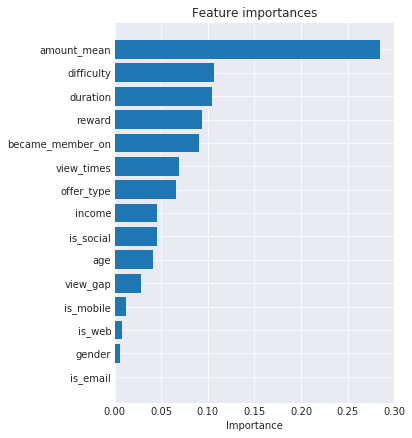

In [49]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = GBC.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [50]:
X_new=df_mid.drop(['complete_tag','is_email','is_web','gender','is_mobile'],axis=1)
tag_col=df_mid['complete_tag']
X_train, X_test, y_train, y_test = train_test_split(X_new, tag_col, test_size=0.3,random_state=0)

In [51]:
param_test = {
        'learning_rate': [0.1, 0.05],
        'max_depth': [3,5],
        'n_estimators': range(50, 200, 50),
        'min_samples_split': [5, 20, 50, 70, 100]
        }
GBC = GradientBoostingClassifier()
gsearch = GridSearchCV(GBC, param_grid=param_test, scoring="roc_auc", cv=5)
gsearch.fit(X_train, y_train)
y_pred=gsearch.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import numpy as np
def display_results(cv, y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()
    auc_score = f1_score(y_test, y_pred)
    
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)
    print("f1_score", auc_score)
display_results(gsearch, y_test, y_pred)

Labels: [0 1]
Confusion Matrix:
 [[8490 1786]
 [ 846 7865]]
Accuracy: 0.861378838152

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 100}
f1_score 0.8566604945
